In [1]:
import scanpy as sc

In [2]:
adata_full = sc.read("../../../../disk1/limb/important_processed_data/11.16_dpt.h5ad")

In [4]:
sc.pp.subsample(adata_full,fraction=0.03)

In [8]:
adata = adata_full[:,adata_full.var["highly_variable"]].copy()

In [11]:
adata.layers["logcounts"] = adata.X.copy()

In [114]:
sc.pp.scale(adata,layer="logcounts")

In [15]:
adata.layers["scale"] = adata.X.copy()

In [105]:
adata.X = adata.layers["scale"].copy()

In [109]:
adata = sc.read("../../processed_data/toy_data/20241116_bone_toy_5000.h5ad")

In [111]:
adata.X =  adata.layers["logcounts"].copy()

In [115]:
adata.X 

array([[-0.53531873, -0.08173341,  1.3322178 , ..., -0.53673214,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341, -0.6559433 , ..., -0.53673214,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341,  0.14380361, ..., -0.53673214,
        -0.23912592, -0.43488967],
       ...,
       [-0.53531873, -0.08173341, -0.6559433 , ...,  2.1166892 ,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341, -0.6559433 , ..., -0.53673214,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341, -0.6559433 , ...,  1.0778837 ,
        -0.23912592, -0.43488967]], dtype=float32)

In [16]:
adata.write_h5ad("../../processed_data/toy_data/20241116_bone_toy_5000.h5ad")

In [77]:
class PolynomialRegression(nn.Module):
    def __init__(self, a, b):
        """
        a: length of array N (first dimension of M)
        b: number of columns in matrix M
        """
        super(PolynomialRegression, self).__init__()
        # Create parameter matrix G with shape (4,b)
        self.G = nn.Parameter(torch.randn(4, b,dtype=torch.float64))
    
    def forward(self, N):
        """
        N: input array of shape (1,a)
        Returns: predicted matrix of shape (a,b)
        """
        # Create polynomial terms: [1, N, N^2, N^3]
        N = N.squeeze()  # Remove the first dimension (1,a) -> (a,)
        N_poly = torch.stack([
            torch.ones_like(N),  # constant term
            N,                   # linear term
            N**2,               # quadratic term
            N**3                # cubic term
        ])  # shape: (4,a)
        
        # Compute predictions using G parameters
        predictions = (N_poly.T @ self.G)  # shape: (a,b)
        return predictions

# Training code
def train_model(M, N, epochs=1000, lr=0.01):
    a, b = M.shape
    model = PolynomialRegression(a, b)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        # Forward pass
        predictions = model(N)
        
        # Compute loss
        loss = criterion(predictions, M)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    return model

# Example usage
if __name__ == "__main__":
    # Example data
    # M has shape (a,b) = (3,4)
    M = torch.tensor([
        [1.0, 2.0, 3.0, 4.0],
        [2.0, 4.0, 6.0, 8.0],
        [3.0, 6.0, 9.0, 12.0]
    ], dtype=torch.float64)
    
    # N has shape (1,a) = (1,3)
    N = torch.tensor([[1.0, 2.0, 3.0]], dtype=torch.float64)
    
    # Train model
    model = train_model(M, N)
    
    # Get trained parameters G
    G = model.G.detach()
    print("Trained parameters G:")
    print(G)  # Shape should be (4,b)

Epoch [100/1000], Loss: 12.0987
Epoch [200/1000], Loss: 0.2454
Epoch [300/1000], Loss: 0.0860
Epoch [400/1000], Loss: 0.0722
Epoch [500/1000], Loss: 0.0620
Epoch [600/1000], Loss: 0.0525
Epoch [700/1000], Loss: 0.0438
Epoch [800/1000], Loss: 0.0361
Epoch [900/1000], Loss: 0.0293
Epoch [1000/1000], Loss: 0.0236
Trained parameters G:
tensor([[ 0.3339,  1.1432,  1.1500,  1.8490],
        [ 0.5745,  1.4392,  1.1855,  0.9270],
        [ 0.1500, -0.4162,  0.8538,  1.6620],
        [-0.0148,  0.1623, -0.1249, -0.2828]], dtype=torch.float64)


In [60]:
M.shape

torch.Size([4, 3])

In [61]:
N.shape

torch.Size([3])

In [62]:
geneMat.shape

torch.Size([4986, 1992])

In [63]:
dpt.shape

torch.Size([4986])

In [41]:
adata.X = adata.X.astype('float64')

In [104]:
adata.X 

array([[-0.53531873, -0.08173341,  1.33221781, ..., -0.53673214,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341, -0.65594327, ..., -0.53673214,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341,  0.14380361, ..., -0.53673214,
        -0.23912592, -0.43488967],
       ...,
       [-0.53531873, -0.08173341, -0.65594327, ...,  2.11668921,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341, -0.65594327, ..., -0.53673214,
        -0.23912592, -0.43488967],
       [-0.53531873, -0.08173341, -0.65594327, ...,  1.07788372,
        -0.23912592, -0.43488967]])

In [70]:
geneMat = torch.tensor(adata.X.copy())
dpt = torch.tensor(adata.obs['pred_dpt'].values.astype('float64'))

In [73]:
geneMat

tensor([[-0.5353, -0.0817,  1.3322,  ..., -0.5367, -0.2391, -0.4349],
        [-0.5353, -0.0817, -0.6559,  ..., -0.5367, -0.2391, -0.4349],
        [-0.5353, -0.0817,  0.1438,  ..., -0.5367, -0.2391, -0.4349],
        ...,
        [-0.5353, -0.0817, -0.6559,  ...,  2.1167, -0.2391, -0.4349],
        [-0.5353, -0.0817, -0.6559,  ..., -0.5367, -0.2391, -0.4349],
        [-0.5353, -0.0817, -0.6559,  ...,  1.0779, -0.2391, -0.4349]],
       dtype=torch.float64)

In [79]:
# Train model
model2 = train_model(geneMat, dpt)

# Get trained parameters G
G = model2.G.detach()

Epoch [100/1000], Loss: 1.1641
Epoch [200/1000], Loss: 1.0182
Epoch [300/1000], Loss: 0.9845
Epoch [400/1000], Loss: 0.9732
Epoch [500/1000], Loss: 0.9682
Epoch [600/1000], Loss: 0.9656
Epoch [700/1000], Loss: 0.9640
Epoch [800/1000], Loss: 0.9628
Epoch [900/1000], Loss: 0.9620
Epoch [1000/1000], Loss: 0.9613


In [82]:
geneMat.shape

torch.Size([4986, 1992])

In [83]:
G.shape

torch.Size([4, 1992])

In [86]:
G[:,0]

tensor([ 0.0078, -0.9825,  2.6701, -1.2160], dtype=torch.float64)

In [92]:
model2(dpt).shape

torch.Size([4986, 1992])

In [96]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def recover_and_plot(model, N, original_M):
    """
    Recover M using trained model and plot comparison
    
    Parameters:
    - model: trained PolynomialRegression model
    - N: input tensor of shape (1,a)
    - original_M: original M tensor for comparison
    """
    # Recover M
    with torch.no_grad():
        recovered_M = model(N)
    
    # Convert to numpy for plotting
    original_M_np = original_M.numpy()
    recovered_M_np = recovered_M.numpy()
    difference = original_M_np - recovered_M_np
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot original M
    im1 = ax1.imshow(original_M_np, cmap='viridis')
    ax1.set_title('Original M')
    plt.colorbar(im1, ax=ax1)
    
    # Plot recovered M
    im2 = ax2.imshow(recovered_M_np, cmap='viridis')
    ax2.set_title('Recovered M')
    plt.colorbar(im2, ax=ax2)
    
    # Plot difference
    im3 = ax3.imshow(difference, cmap='RdBu_r')
    ax3.set_title('Difference (Original - Recovered)')
    plt.colorbar(im3, ax=ax3)
    
    plt.tight_layout()
    
    # Print some statistics
    print("Mean Absolute Error:", np.mean(np.abs(difference)))
    print("Max Absolute Error:", np.max(np.abs(difference)))
    print("Mean Squared Error:", np.mean(difference**2))
    
    return recovered_M, difference

Mean Absolute Error: 0.5639964788367734
Max Absolute Error: 43.40460943288205
Mean Squared Error: 0.9612719876212251


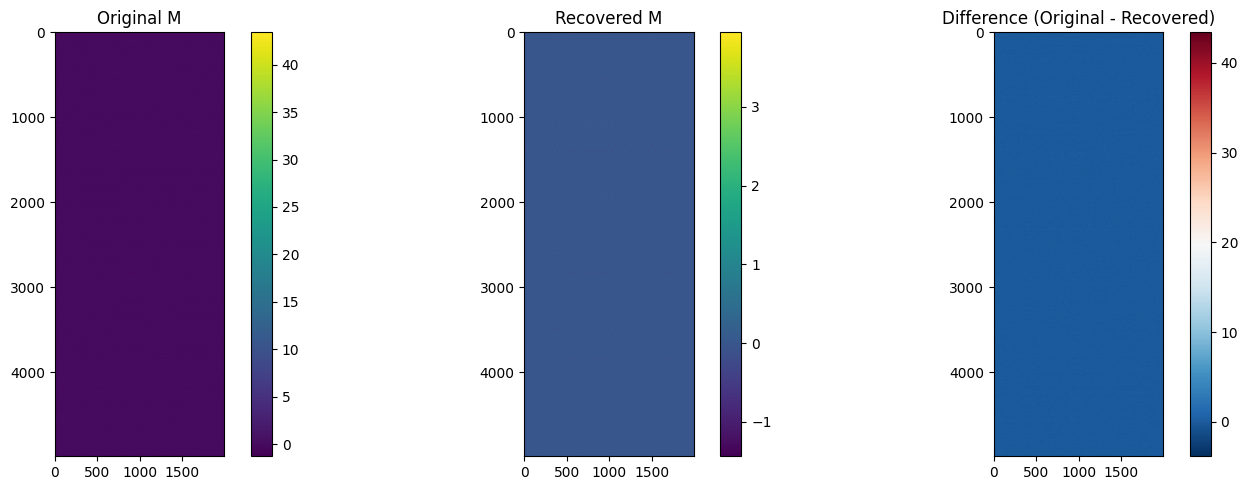

In [97]:
diff = recover_and_plot(model2,dpt,geneMat)

In [146]:

def plot_scatter_comparison(model, N, original_M, column_idx=1):
    """
    Create scatter plot comparing original and recovered values
    
    Parameters:
    - model: trained PolynomialRegression model
    - N: input tensor of shape (1,a)
    - original_M: original M tensor
    - column_idx: which column of M to plot (default=1)
    """
    # Recover M
    with torch.no_grad():
        recovered_M = model(N)
    
    # Convert to numpy
    N_np = N.squeeze().numpy()
    original_M_np = original_M[:, column_idx].numpy()
    recovered_M_np = recovered_M[:, column_idx].numpy()
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(N_np, original_M_np, color='blue', label='Original', marker='o')
    plt.plot(N_np, recovered_M_np, color='red', label='Recovered', linestyle='--')
    
    # Add labels and title
    plt.xlabel('N values')
    plt.ylabel(f'M values (column {column_idx})')
    plt.title(f'Original vs Recovered Values for Column {column_idx}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Print error metrics
    difference = original_M_np - recovered_M_np
    print(f"Mean Absolute Error: {np.mean(np.abs(difference)):.4f}")
    print(f"Mean Squared Error: {np.mean(difference**2):.4f}")
    
    return recovered_M

In [133]:
with torch.no_grad():
    recovered_M = model2(dpt)

In [136]:
N_np = dpt.squeeze().numpy()

In [134]:
recovered_M_np = recovered_M[:, 1].numpy()

In [142]:
original_M_np = geneMat[:, 1].numpy()

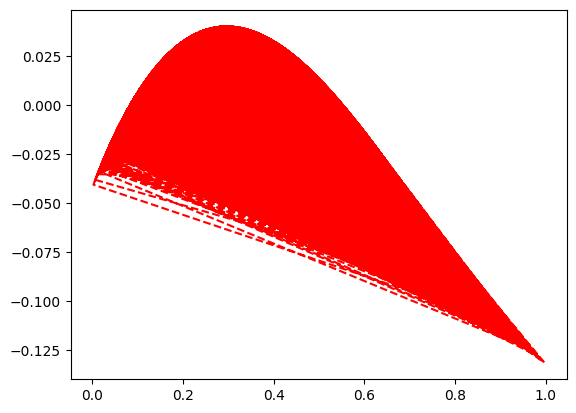

In [145]:
plt.plot(N_np, recovered_M_np, color='red', label='Recovered', linestyle='--')

ValueError: Unrecognized marker style '--'

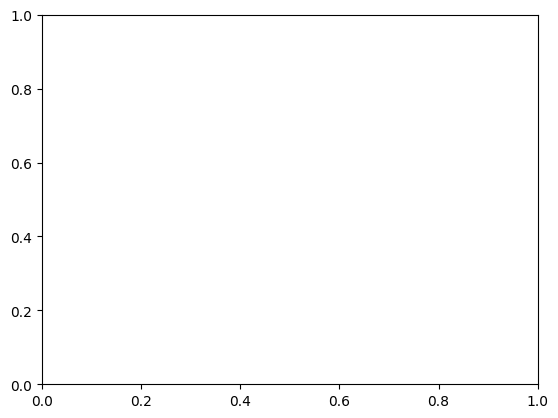

In [144]:
plt.scatter(N_np, original_M_np, color='blue', label='Original', marker='--')

Mean Absolute Error: 0.7487
Mean Squared Error: 0.8675


tensor([[-0.0302, -0.0181,  0.2923,  ...,  0.0592,  0.0284,  0.0197],
        [ 0.1399, -0.0213, -0.4623,  ..., -0.1136, -0.0145, -0.0625],
        [ 0.0623,  0.0040, -0.3565,  ..., -0.0870, -0.0009, -0.0540],
        ...,
        [-0.0829,  0.0399, -0.0325,  ..., -0.0011,  0.0075, -0.0068],
        [ 0.1942, -0.0395, -0.5286,  ..., -0.1283, -0.0291, -0.0633],
        [ 0.4352, -0.1191, -0.7891,  ..., -0.1505, -0.1783,  0.0051]],
       dtype=torch.float64)

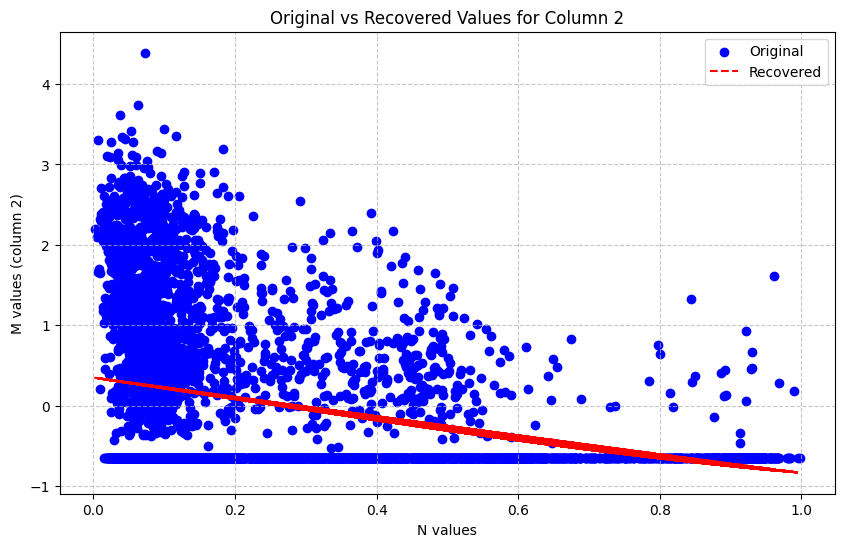

In [152]:
plot_scatter_comparison(model2, dpt, geneMat, column_idx=2)

Mean Absolute Error: 0.7538
Mean Squared Error: 0.9806


tensor([[-0.0302, -0.0181,  0.2923,  ...,  0.0592,  0.0284,  0.0197],
        [ 0.1399, -0.0213, -0.4623,  ..., -0.1136, -0.0145, -0.0625],
        [ 0.0623,  0.0040, -0.3565,  ..., -0.0870, -0.0009, -0.0540],
        ...,
        [-0.0829,  0.0399, -0.0325,  ..., -0.0011,  0.0075, -0.0068],
        [ 0.1942, -0.0395, -0.5286,  ..., -0.1283, -0.0291, -0.0633],
        [ 0.4352, -0.1191, -0.7891,  ..., -0.1505, -0.1783,  0.0051]],
       dtype=torch.float64)

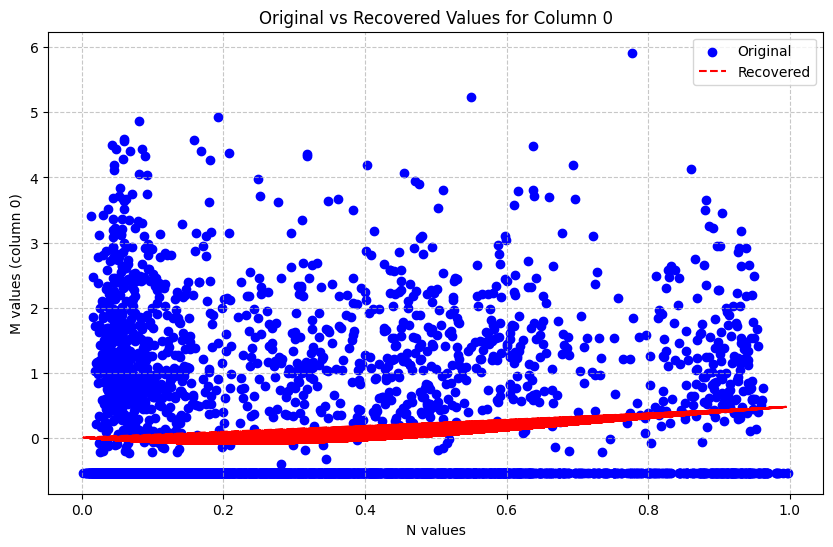

In [154]:
plot_scatter_comparison(model2, dpt, geneMat, column_idx=0)

Mean Absolute Error: 0.6679
Mean Squared Error: 0.9135


tensor([[-0.0302, -0.0181,  0.2923,  ...,  0.0592,  0.0284,  0.0197],
        [ 0.1399, -0.0213, -0.4623,  ..., -0.1136, -0.0145, -0.0625],
        [ 0.0623,  0.0040, -0.3565,  ..., -0.0870, -0.0009, -0.0540],
        ...,
        [-0.0829,  0.0399, -0.0325,  ..., -0.0011,  0.0075, -0.0068],
        [ 0.1942, -0.0395, -0.5286,  ..., -0.1283, -0.0291, -0.0633],
        [ 0.4352, -0.1191, -0.7891,  ..., -0.1505, -0.1783,  0.0051]],
       dtype=torch.float64)

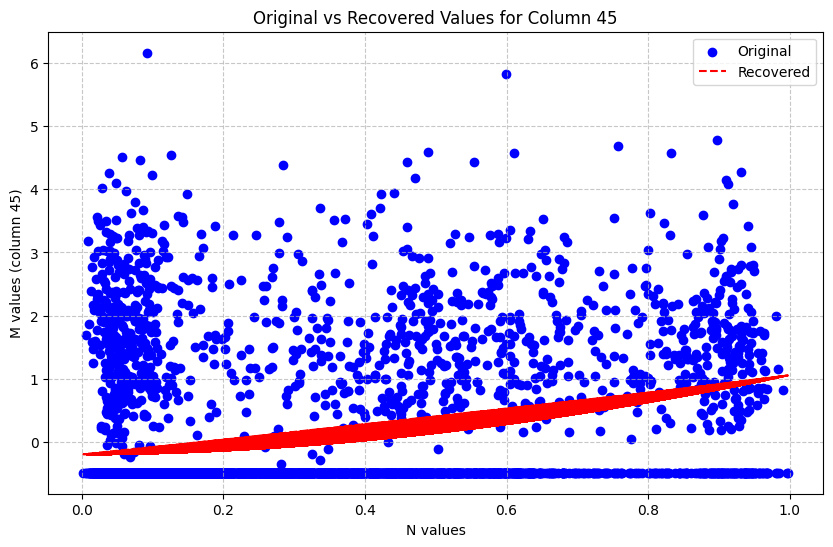

In [161]:
plot_scatter_comparison(model2, dpt, geneMat, column_idx=45)

In [160]:
geneMat[1].max()

tensor(8.5766, dtype=torch.float64)

In [150]:

def plot_scatter_comparison2(model, N, original_M, column_idx=1):
    """
    Create scatter plot comparing original and recovered values
    
    Parameters:
    - model: trained PolynomialRegression model
    - N: input tensor of shape (1,a)
    - original_M: original M tensor
    - column_idx: which column of M to plot (default=1)
    """
    # Recover M
    with torch.no_grad():
        recovered_M = model(N)
    
    # Convert to numpy
    N_np = N.squeeze().numpy()
    original_M_np = original_M[:, column_idx].numpy()
    recovered_M_np = recovered_M[:, column_idx].numpy()
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(N_np, original_M_np, color='blue', label='Original', marker='o')
    plt.plot(N_np, recovered_M_np, color='red', label='Recovered', linestyle='--')

    
    return recovered_M

tensor([[  0.4794,  -0.1320,  -0.8362,  ...,  -0.1418,  -0.2357,   0.0416],
        [ -1.0050,   0.7361,  -0.6076,  ...,   1.5347,  -3.7363,   2.9373],
        [-11.7415,   6.0865,   2.8040,  ...,   8.2901, -15.3005,  13.2018]],
       dtype=torch.float64)

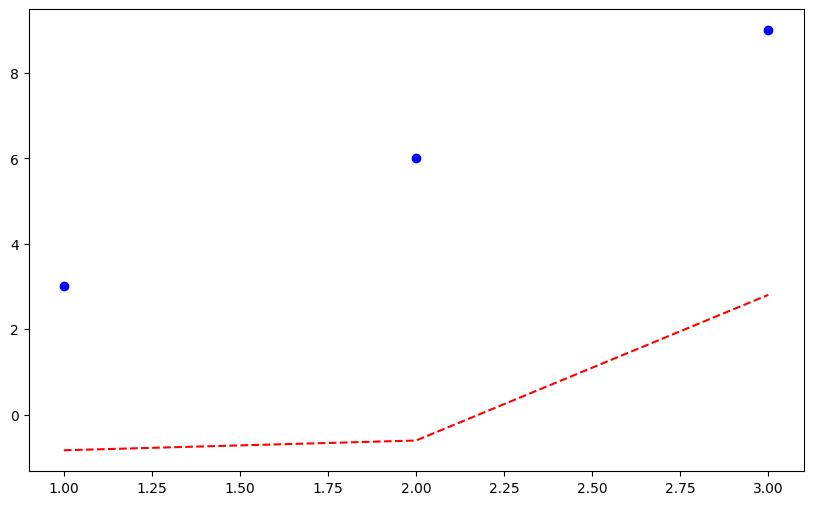

In [151]:
plot_scatter_comparison2(model2, , M, column_idx=2)